In [124]:
from matplotlib import pyplot
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from statistics import stdev
from statsmodels.tsa.stattools import adfuller


In [53]:
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression 


In [123]:
!pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 26.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 kB 1.4 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 20.4
    Uninstalling packaging-20.4:
      Successfully uninstalled packaging-20.4


In [113]:
juve = pd.read_csv('/Users/gavinhartzell/Downloads/juve.csv',na_filter = True, keep_default_na = False)
boruf = pd.read_csv('/Users/gavinhartzell/Downloads/BORUF.csv',na_filter = True, keep_default_na = False)
msgs = pd.read_csv('/Users/gavinhartzell/Downloads/msgs.csv',na_filter = True, keep_default_na = False)
manu = pd.read_csv('/Users/gavinhartzell/Downloads/MANU.csv',na_filter = True, keep_default_na = False)
braves = pd.read_csv('/Users/gavinhartzell/Downloads/braves.csv',na_filter = True, keep_default_na = False)
avg = pd.read_csv('/Users/gavinhartzell/Downloads/avg.csv',na_filter = True, keep_default_na = False)

In [90]:
print(len(juve))
print(len(boruf))
print(len(msgs))
print(len(braves))
print(len(manu))

1258
1257
1257
1257
1257


In [91]:
print(juve)

         Date  Euro Prices Unnamed: 2 Unnamed: 3 Unnamed: 4    Prices
0      2/5/18         0.81      43136     2/5/18    € 0.81   1.001855
1      2/6/18         0.78      43137     2/5/18    € 0.81   0.964750
2      2/7/18         0.81      43138     2/5/18    € 0.81   1.001855
3      2/8/18         0.78      43139     2/5/18    € 0.81   0.964750
4      2/9/18         0.77      43140     2/5/18    € 0.81   0.952381
...       ...          ...        ...        ...        ...       ...
1253  1/30/23         0.29      44956    1/23/23    € 0.92   0.315286
1254  1/31/23         0.30      44957    1/23/23    € 0.92   0.326158
1255   2/1/23         0.30      44958    1/23/23    € 0.92   0.326158
1256   2/2/23         0.30      44959    1/23/23    € 0.92   0.326158
1257   2/3/23         0.30      44960    1/23/23    € 0.92   0.326158

[1258 rows x 6 columns]


In [92]:
for i in range(0,1256):
    print(i)
    val = juve["Date"][i]
    print(val in list(braves['2/5/18']))

0
False
1
True
2
True
3
True
4
True
5
True
6
True
7
True
8
True
9
True
10
True
11
True
12
True
13
True
14
True
15
True
16
True
17
True
18
True
19
True
20
True
21
True
22
True
23
True
24
True
25
True
26
True
27
True
28
True
29
True
30
True
31
True
32
True
33
True
34
True
35
True
36
True
37
True
38
True
39
True
40
True
41
True
42
True
43
True
44
True
45
True
46
True
47
True
48
True
49
True
50
True
51
True
52
True
53
True
54
True
55
True
56
True
57
True
58
True
59
True
60
True
61
True
62
True
63
True
64
True
65
True
66
True
67
True
68
True
69
True
70
True
71
True
72
True
73
True
74
True
75
True
76
True
77
True
78
True
79
True
80
True
81
True
82
True
83
True
84
True
85
True
86
True
87
True
88
True
89
True
90
True
91
True
92
True
93
True
94
True
95
True
96
True
97
True
98
True
99
True
100
True
101
True
102
True
103
True
104
True
105
True
106
True
107
True
108
True
109
True
110
True
111
True
112
True
113
True
114
True
115
True
116
True
117
True
118
True
119
True
120
True
121
True
122
True
12

933
True
934
True
935
True
936
True
937
True
938
True
939
True
940
True
941
True
942
True
943
True
944
True
945
True
946
True
947
True
948
True
949
True
950
True
951
True
952
True
953
True
954
True
955
True
956
False
957
True
958
True
959
True
960
True
961
True
962
True
963
True
964
True
965
True
966
True
967
True
968
True
969
True
970
True
971
True
972
True
973
True
974
True
975
True
976
True
977
True
978
True
979
True
980
True
981
True
982
True
983
True
984
True
985
True
986
True
987
True
988
True
989
True
990
True
991
False
992
True
993
True
994
True
995
True
996
True
997
True
998
True
999
True
1000
True
1001
True
1002
True
1003
True
1004
True
1005
True
1006
True
1007
True
1008
True
1009
True
1010
True
1011
True
1012
True
1013
True
1014
True
1015
True
1016
False
1017
True
1018
True
1019
True
1020
True
1021
True
1022
True
1023
True
1024
True
1025
True
1026
True
1027
True
1028
True
1029
True
1030
True
1031
True
1032
True
1033
True
1034
True
1035
True
1036
True
1037
True
1038
True
1039

In [114]:
juve_prices = []
boruf_prices = []
msgs_prices = []
braves_prices = []
manu_prices = []
avg_prices = []
juve_returns = []
boruf_returns = []
msgs_returns = []
braves_returns = []
manu_returns = []
for i in range(0,1256):
    boruf_prices.append(float(boruf["7.83"][i]))
    msgs_prices.append(float(msgs["Price"][i][2:]))
    manu_prices.append(float(manu["19.05"][i]))
    braves_prices.append(float(braves["23"][i]))
    juve_prices.append(float(juve["Prices"][i]))
    avg_prices.append(float(avg["Prices"][i]))
for i in range(1,1256):
    juve_returns.append(((juve_prices[i])-juve_prices[i-1])/juve_prices[i-1])
    boruf_returns.append((boruf_prices[i]-boruf_prices[i-1])/boruf_prices[i-1])
    braves_returns.append((braves_prices[i]-braves_prices[i-1])/braves_prices[i-1])
    manu_returns.append((manu_prices[i]-manu_prices[i-1])/manu_prices[i-1])
    msgs_returns.append((msgs_prices[i]-msgs_prices[i-1])/msgs_prices[i-1])


   

In [115]:
print(avg)

           Prices     Date
0               1   2/5/18
1     0.989848881   2/6/18
2      0.97016446   2/7/18
3     0.973222548   2/8/18
4     0.972215088   2/9/18
...           ...      ...
1253  0.947971516  1/30/23
1254  0.954557021  1/31/23
1255  0.953575511   2/1/23
1256  0.951310033   2/2/23
1257                      

[1258 rows x 2 columns]


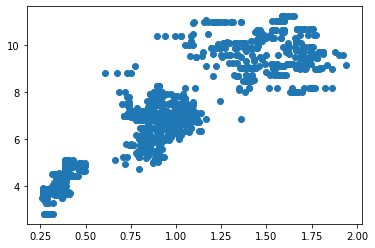

Juventus and Dortmund
0.8983459440040489


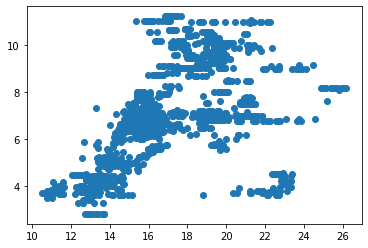

Manchester United and Dortmund
0.5117485578978747


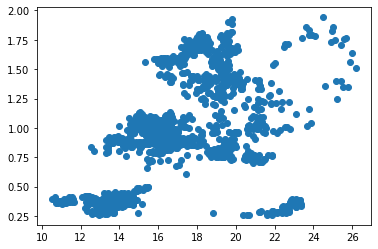

Manchester United and Juventus
0.4728128987640716


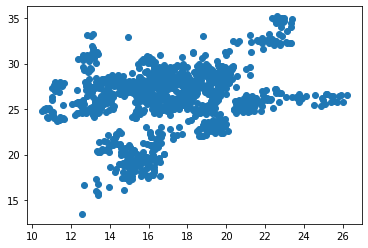

Manchester United and Atlanta Braves
0.2575787636495624


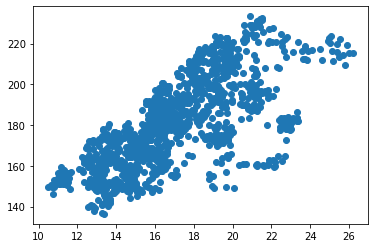

Manchester United and MSG Sports
0.709067140045072


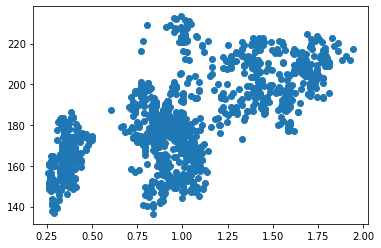

Juventus and MSG Sports
0.6576264764912442


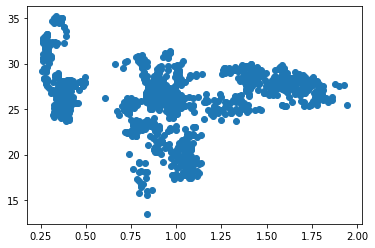

Juventus and Braves
-0.047796937870886055


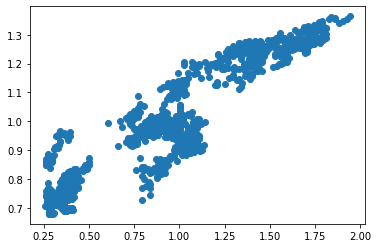

Juventus and Average
0.9198185313676448


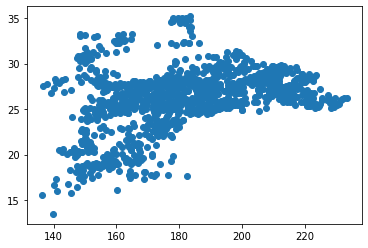

MSG Sports and Braves
-0.047796937870886055


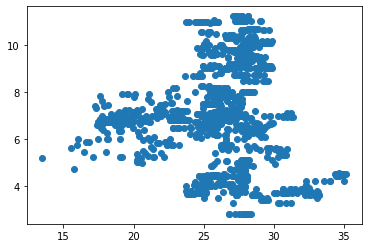

Braves and Dortmund
-0.00344362318206665


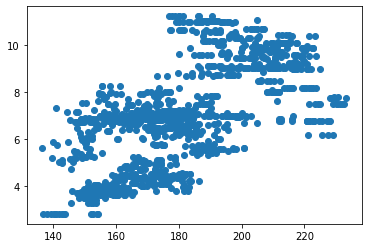

MSG Sports and Dortmund
0.6589766727483277


In [116]:
pyplot.scatter(juve_prices,boruf_prices)
pyplot.show()
print("Juventus and Dortmund")
print(np.corrcoef(juve_prices,boruf_prices)[1][0])

pyplot.scatter(manu_prices,boruf_prices)
pyplot.show()
print("Manchester United and Dortmund")
print(np.corrcoef(manu_prices,boruf_prices)[1][0])

pyplot.scatter(manu_prices,juve_prices)
pyplot.show()
print("Manchester United and Juventus")
print(np.corrcoef(manu_prices,juve_prices)[1][0])

pyplot.scatter(manu_prices,braves_prices)
pyplot.show()
print("Manchester United and Atlanta Braves")
print(np.corrcoef(manu_prices,braves_prices)[1][0])

pyplot.scatter(manu_prices,msgs_prices)
pyplot.show()
print("Manchester United and MSG Sports")
print(np.corrcoef(manu_prices,msgs_prices)[1][0])

pyplot.scatter(juve_prices,msgs_prices)
pyplot.show()
print("Juventus and MSG Sports")
print(np.corrcoef(juve_prices,msgs_prices)[1][0])

pyplot.scatter(juve_prices,braves_prices)
pyplot.show()
print("Juventus and Braves")
print(np.corrcoef(juve_prices,braves_prices)[1][0])



pyplot.scatter(msgs_prices,braves_prices)
pyplot.show()
print("MSG Sports and Braves")
print(np.corrcoef(juve_prices,braves_prices)[1][0])

pyplot.scatter(braves_prices,boruf_prices)
pyplot.show()
print("Braves and Dortmund")
print(np.corrcoef(braves_prices,boruf_prices)[1][0])

pyplot.scatter(msgs_prices,boruf_prices)
pyplot.show()
print("MSG Sports and Dortmund")
print(np.corrcoef(msgs_prices,boruf_prices)[1][0])

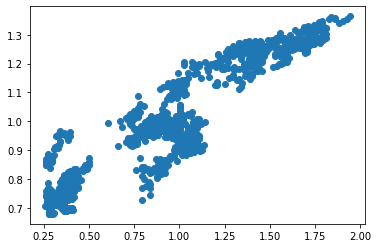

Juventus and Average
0.9198185313676448


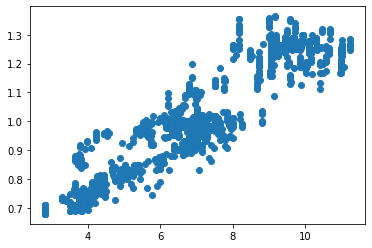

Dortmund and Average
0.9162704348616897


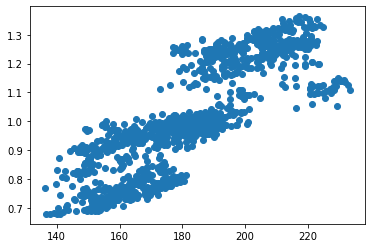

MSGS and Average
0.8434618170860151


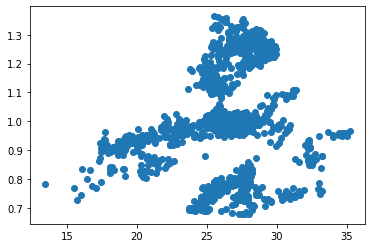

Braves and Average
0.23388140225362297


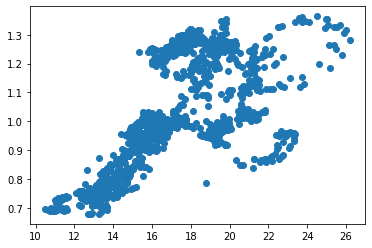

Manchester United and Average
0.6966765942221083


In [117]:
pyplot.scatter(juve_prices,avg_prices)
pyplot.show()
print("Juventus and Average")
print(np.corrcoef(juve_prices,avg_prices)[1][0])

pyplot.scatter(boruf_prices,avg_prices)
pyplot.show()
print("Dortmund and Average")
print(np.corrcoef(boruf_prices,avg_prices)[1][0])

pyplot.scatter(msgs_prices,avg_prices)
pyplot.show()
print("MSGS and Average")
print(np.corrcoef(msgs_prices,avg_prices)[1][0])

pyplot.scatter(braves_prices,avg_prices)
pyplot.show()
print("Braves and Average")
print(np.corrcoef(braves_prices,avg_prices)[1][0])

pyplot.scatter(manu_prices,avg_prices)
pyplot.show()
print("Manchester United and Average")
print(np.corrcoef(manu_prices,avg_prices)[1][0])


In [96]:
juve_prices_train = juve_prices[:-300]
juve_prices_test = juve_prices[len(juve_prices)-300:]
manu_prices_train = manu_prices[:-5300]
manu_prices_test = manu_prices[len(manu_prices)-300:]
braves_prices_train = braves_prices[:-300]
braves_prices_test = braves_prices[len(braves_prices)-300:]
boruf_prices_train = boruf_prices[:-300]
boruf_prices_test = boruf_prices[len(boruf_prices)-300:]
msgs_prices_train = msgs_prices[:-300]
msgs_prices_test = msgs_prices[len(boruf_prices)-300:]

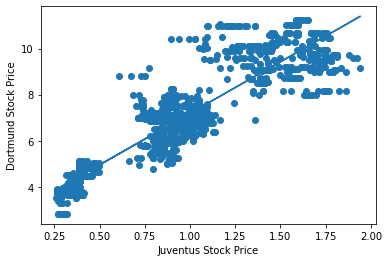

R-squared value with linear regression: 0.8070254351085274


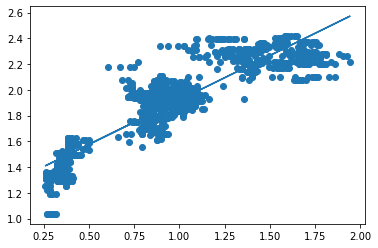

R-squared value with log regression: 0.8095126619363419
0.961485989539162
1.042434205517224e-06
Augmented Dickey-Fuller P-Value: 1.042434205517224e-06


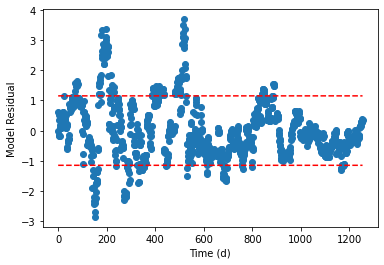

short at: 0.841566045 and 7.64
cover at: 0.799803125 and 5.75
-49.6252436135301
247.38219895287958
short at: 0.7388869029999999 and 7.33
cover at: 0.780521901 and 6.2
12.294656487906657
416.7863844599372
long at: 1.357982426 and 6.88
sell at: 1.3854930730000001 and 9.75
911.1232979403286
-12.310076891724385
923.433374832053
short at: 1.327279078 and 9.875
cover at: 1.342434585 and 8.68
4.3102218273208095
1099.5747591884426
short at: 1.43606109 and 10.58
cover at: 1.607020743 and 9.7
189.06527960357707
1228.65882267114
long at: 1.8121723269999999 and 9.65
sell at: 1.657900755 and 10.33
1683.6180162519167
334.54197132446575
1349.076044927451
long at: 1.6326530609999999 and 8.0
sell at: 1.4979164319999998 and 9.6
2203.9772893207523
486.53944276810967
1717.4378465526427
long at: 1.808035714 and 9.05
sell at: 1.733258301 and 10.68
2669.5023368494994
573.4742703193531
2096.0280665301466
short at: 1.641526176 and 11.24
cover at: 1.5860605380000001 and 9.1
494.5852065802173
2540.5447480629728


In [189]:
X = juve_prices
Y = boruf_prices

model = LinearRegression()
log_model = LogisticRegression()
model.fit(np.array(X).reshape(-1,1), np.array(Y).reshape(-1,1))
y_pred = model.predict(np.array(X).reshape(-1,1))
pyplot.scatter(X,Y)
pyplot.plot(X,y_pred)
pyplot.xlabel("Juventus Stock Price")
pyplot.ylabel("Dortmund Stock Price")
pyplot.show()
print("R-squared value with linear regression: " + str(r2_score(Y, y_pred)))
model.fit(np.array(X).reshape(-1,1), np.array(np.log(Y)).reshape(-1,1))
y_pred2 = model.predict(np.array(X).reshape(-1,1))
pyplot.scatter(X,np.log(Y))
pyplot.plot(X,y_pred2)
pyplot.show()
print("R-squared value with log regression: " + str(r2_score(np.log(Y), y_pred2)))
res = []
vals = []

for i in range(0,len(X)-1):
    vals.append(i)
    res.append(Y[i]-list(y_pred)[i][0])
print(stdev(res))
lower_limit = []
upper_limit = []
lower = -1.2*stdev(res)
upper = 1.2*stdev(res)

for i in range (0,len(res)):
    lower_limit.append(lower)
    upper_limit.append(upper)
adf = list(adfuller(res))
print(adf[1])
print("Augmented Dickey-Fuller P-Value: " + str(adf[1]))
pyplot.plot(lower_limit,"r--")
pyplot.plot(upper_limit,"r--")
pyplot.scatter(vals,res)
pyplot.xlabel("Time (d)")
pyplot.ylabel("Model Residual")
pyplot.show()

#track P&L
profits_X = 0
profits_Y = 0 
Y_shares = 0 
X_shares = 0
long = False
short = False
account_value = 2000
prof = []
for i in range(0,len(X)-1):
    prof.append(profits_X + profits_Y)
    account_value = 2000 + profits_X + profits_Y
    if res[i] > upper and not(long) and not(short):
            X_price = X[i]
            Y_price = Y[i]
            X_shares = account_value/2/X[i]
            Y_shares = account_value/2/Y[i]
            short = True
            print("short at: " + str(X[i]) + str(" and ") + str(Y[i]))
    if res[i] < lower and not(long) and not(short):
        X_price = X[i]
        Y_price = Y[i]
        X_shares = account_value/2/X[i]
        Y_shares = account_value/2/Y[i]
        long = True
        print("long at: " + str(X[i]) + str(" and ") + str(Y[i]))
    if res[i] > 0 and long: 
            profits_X = X_shares * (X_price - X[i]) + profits_X
            profits_Y =Y_shares * ( Y[i] - Y_price)+ profits_Y
            long = False
            print("sell at: "+ str(X[i]) + str(" and ") + str(Y[i]))
            print(profits_X + profits_Y)
            short = False
            print(profits_X)
            print(profits_Y)
    if res[i] < 0 and short:
            long = False
            short = False
            print("cover at: "+ str(X[i]) + str(" and ") + str(Y[i]))
            profits_Y =Y_shares * (Y_price - Y[i]) + profits_Y
            profits_X =X_shares *  (X[i] - X_price) + profits_X
            print(profits_X)
            print(profits_Y)
print(((profits_X + profits_Y+2000)/2000)**(1/5)-1)
print(prof)

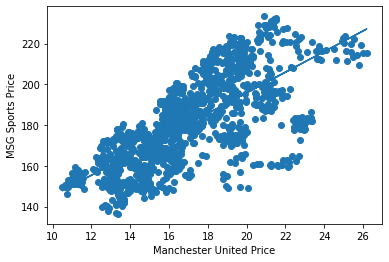

R-squared value with linear regression: 0.5027762090916976


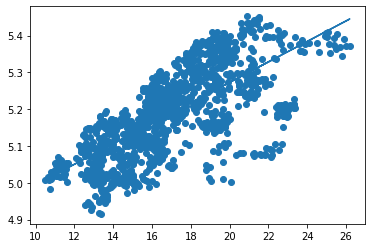

R-squared value with log regression: 0.5036139900954669
15.248561190389767
0.0017036548246335279
Augmented Dickey-Fuller P-Value: 0.0017036548246335279


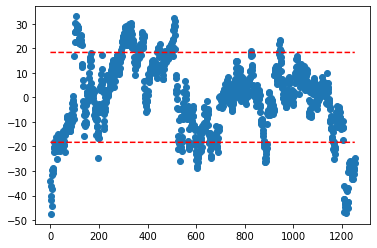

long at: 18.8 and 155.8
sell at: 20.95 and 201.36
178.0644852921094
-114.3617021276595
292.4261874197689
short at: 20.6 and 221.19
cover at: 23.65 and 212.62
46.87850855537272
334.6207094120682
long at: 21.8 and 180.1
sell at: 19.4 and 195.84
616.6575412783757
177.97020862697508
438.68733265140065
short at: 19.59 and 213.0
cover at: 16.94 and 180.08
0.9885219402039809
640.8947651839924
short at: 16.52 and 196.61
cover at: 16.93 and 179.57
33.77218258551031
755.3795096339094
long at: 13.29 and 140.84
sell at: 15.0 and 172.67
924.8898935181332
-145.66534163176624
1070.5552351498995
long at: 16.6 and 160.0
sell at: 15.31 and 172.22
1150.2319565268085
-32.0175114318146
1182.2494679586232
short at: 15.54 and 192.03
cover at: 15.43 and 171.24
-43.16698103342165
1352.7783498421632
long at: 15.9 and 156.19
sell at: 17.29 and 183.75
1456.9393375024258
-187.8323836322942
1644.77172113472
short at: 16.6 and 197.26
cover at: 15.49 and 172.63
-303.4107771451766
1860.5894639175567
long at: 12.92 and

In [191]:
X = manu_prices
Y = msgs_prices

model = LinearRegression()
log_model = LogisticRegression()
model.fit(np.array(X).reshape(-1,1), np.array(Y).reshape(-1,1))
y_pred = model.predict(np.array(X).reshape(-1,1))
pyplot.scatter(X,Y)
pyplot.plot(X,y_pred)
pyplot.xlabel("Manchester United Price")
pyplot.ylabel("MSG Sports Price")

pyplot.show()
print("R-squared value with linear regression: " + str(r2_score(Y, y_pred)))
model.fit(np.array(X).reshape(-1,1), np.array(np.log(Y)).reshape(-1,1))
y_pred2 = model.predict(np.array(X).reshape(-1,1))
pyplot.scatter(X,np.log(Y))
pyplot.plot(X,y_pred2)
pyplot.show()
print("R-squared value with log regression: " + str(r2_score(np.log(Y), y_pred2)))
res = []
vals = []

for i in range(0,len(X)-1):
    vals.append(i)
    res.append(Y[i]-list(y_pred)[i][0])
print(stdev(res))
lower_limit = []
upper_limit = []
lower = -1.2*stdev(res)
upper = 1.2*stdev(res)

for i in range (0,len(res)):
    lower_limit.append(lower)
    upper_limit.append(upper)
adf = list(adfuller(res))
print(adf[1])
print("Augmented Dickey-Fuller P-Value: " + str(adf[1]))
pyplot.plot(lower_limit,"r--")
pyplot.plot(upper_limit,"r--")
pyplot.scatter(vals,res)
pyplot.show()

#track P&L
profits_X = 0
profits_Y = 0 
Y_shares = 0 
X_shares = 0
long = False
short = False
account_value = 2000
prof = []
for i in range(0,len(X)-1):
    prof.append(profits_X + profits_Y)
    account_value = 2000 + profits_X + profits_Y
    if res[i] > upper and not(long) and not(short):
            X_price = X[i]
            Y_price = Y[i]
            X_shares = account_value/2/X[i]
            Y_shares = account_value/2/Y[i]
            short = True
            print("short at: " + str(X[i]) + str(" and ") + str(Y[i]))
    if res[i] < lower and not(long) and not(short):
        X_price = X[i]
        Y_price = Y[i]
        X_shares = account_value/2/X[i]
        Y_shares = account_value/2/Y[i]
        long = True
        print("long at: " + str(X[i]) + str(" and ") + str(Y[i]))
    if res[i] > 0 and long: 
            profits_X = X_shares * (X_price - X[i]) + profits_X
            profits_Y =Y_shares * ( Y[i] - Y_price)+ profits_Y
            long = False
            print("sell at: "+ str(X[i]) + str(" and ") + str(Y[i]))
            print(profits_X + profits_Y)
            short = False
            print(profits_X)
            print(profits_Y)
    if res[i] < 0 and short:
            long = False
            short = False
            print("cover at: "+ str(X[i]) + str(" and ") + str(Y[i]))
            profits_Y =Y_shares * (Y_price - Y[i]) + profits_Y
            profits_X =X_shares *  (X[i] - X_price) + profits_X
            print(profits_X)
            print(profits_Y)
print(((profits_X + profits_Y+2000)/2000)**(1/5)-1)
print(prof)

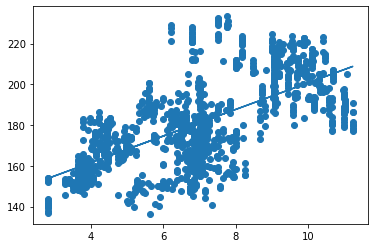

R-squared value with linear regression: 0.4342502552264571


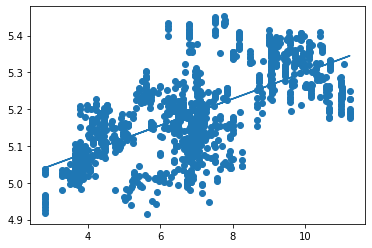

R-squared value with log regression: 0.4412422268577939
16.276218563064145
0.0009544545809946744
Augmented Dickey-Fuller test for Stationarity p-value: 0.0009544545809946744


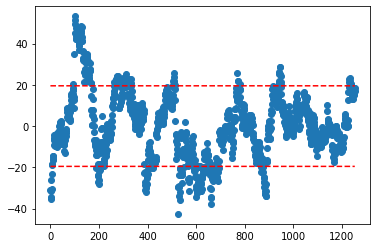

long at: 7.83 and 155.8
sell at: 5.75 and 173.15
377.00567417047426
265.6449553001277
111.36071887034655
short at: 7.0 and 201.36
cover at: 11.08 and 204.95
958.3723232012374
90.17118179676703
long at: 11.0 and 186.89
sell at: 9.04 and 199.08
1419.5624558775628
1229.969835464696
189.59262041286675
short at: 8.49 and 210.38
cover at: 9.05 and 194.3
1342.7469247044744
320.27653592411104
long at: 11.24 and 186.21
sell at: 9.1 and 196.61
2114.019268241773
1691.4511153515018
422.56815289027105
short at: 9.26 and 216.02
cover at: 10.41 and 196.0
1946.9112750965364
613.2048202132049
long at: 8.0 and 158.3
sell at: 6.88 and 182.44
3227.0222716996072
2266.1194017682183
960.902869931389
long at: 7.92 and 167.59
sell at: 6.75 and 179.75
3802.740359578579
2652.2062741096665
1150.5340854689127
short at: 6.69 and 204.83
cover at: 6.54 and 177.45
2587.1531310650635
1538.3655336094723
long at: 7.2 and 160.06
sell at: 7.13 and 182.18
4578.563243805223
2616.9299579072313
1961.6332858979915
short at: 5.5

In [188]:
X = boruf_prices
Y = msgs_prices

model = LinearRegression()
log_model = LogisticRegression()
model.fit(np.array(X).reshape(-1,1), np.array(Y).reshape(-1,1))
y_pred = model.predict(np.array(X).reshape(-1,1))
pyplot.scatter(X,Y)
pyplot.plot(X,y_pred)
pyplot.show()
print("R-squared value with linear regression: " + str(r2_score(Y, y_pred)))
model.fit(np.array(X).reshape(-1,1), np.array(np.log(Y)).reshape(-1,1))
y_pred2 = model.predict(np.array(X).reshape(-1,1))
pyplot.scatter(X,np.log(Y))
pyplot.plot(X,y_pred2)
pyplot.show()
print("R-squared value with log regression: " + str(r2_score(np.log(Y), y_pred2)))
res = []
vals = []

for i in range(0,len(X)-1):
    vals.append(i)
    res.append(Y[i]-list(y_pred)[i][0])
print(stdev(res))
lower_limit = []
upper_limit = []
lower = -1.2*stdev(res)
upper = 1.2*stdev(res)

for i in range (0,len(res)):
    lower_limit.append(lower)
    upper_limit.append(upper)
adf = list(adfuller(res))
print(adf[1])
print("Augmented Dickey-Fuller test for Stationarity p-value: " + str(adf[1]))
pyplot.plot(lower_limit,"r--")
pyplot.plot(upper_limit,"r--")
pyplot.scatter(vals,res)
pyplot.show()

#track P&L
profits_X = 0
profits_Y = 0 
Y_shares = 0 
X_shares = 0
long = False
short = False
account_value = 2000
prof = []
for i in range(0,len(X)-1):
    prof.append(profits_X + profits_Y)
    account_value = 2000 + profits_X + profits_Y
    if res[i] > upper and not(long) and not(short):
            X_price = X[i]
            Y_price = Y[i]
            X_shares = account_value/2/X[i]
            Y_shares = account_value/2/Y[i]
            short = True
            print("short at: " + str(X[i]) + str(" and ") + str(Y[i]))
    if res[i] < lower and not(long) and not(short):
        X_price = X[i]
        Y_price = Y[i]
        X_shares = account_value/2/X[i]
        Y_shares = account_value/2/Y[i]
        long = True
        print("long at: " + str(X[i]) + str(" and ") + str(Y[i]))
    if res[i] > 0 and long: 
            profits_X = X_shares * (X_price - X[i]) + profits_X
            profits_Y =Y_shares * ( Y[i] - Y_price)+ profits_Y
            long = False
            print("sell at: "+ str(X[i]) + str(" and ") + str(Y[i]))
            print(profits_X + profits_Y)
            short = False
            print(profits_X)
            print(profits_Y)
    if res[i] < 0 and short:
            long = False
            short = False
            print("cover at: "+ str(X[i]) + str(" and ") + str(Y[i]))
            profits_Y =Y_shares * (Y_price - Y[i]) + profits_Y
            profits_X =X_shares *  (X[i] - X_price) + profits_X
            print(profits_X)
            print(profits_Y)
print(((profits_X + profits_Y+2000)/2000)**(1/5)-1)
print(prof)


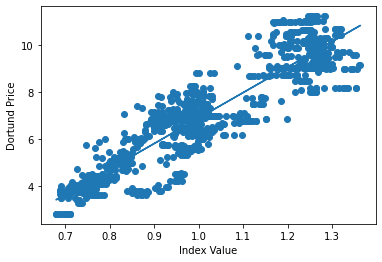

R-squared value with linear regression: 0.8395515098016311


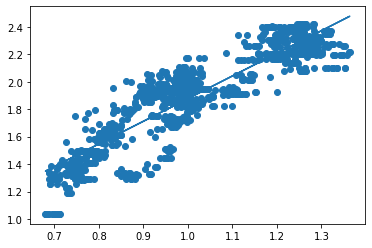

R-squared value with log regression: 0.8181574413631452
0.8751644926486484
0.0017264217712370244
Augmented Dickey-Fuller test for Stationarity p-value: 0.0017264217712370244


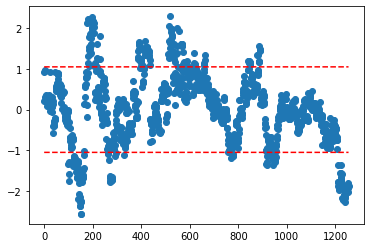

In [179]:
X = avg_prices
Y = boruf_prices

model = LinearRegression()
log_model = LogisticRegression()
model.fit(np.array(X).reshape(-1,1), np.array(Y).reshape(-1,1))
y_pred = model.predict(np.array(X).reshape(-1,1))
pyplot.scatter(X,Y)
pyplot.plot(X,y_pred)
pyplot.xlabel("Index Value")
pyplot.ylabel("Dortund Price")
pyplot.show()
print("R-squared value with linear regression: " + str(r2_score(Y, y_pred)))
model.fit(np.array(X).reshape(-1,1), np.array(np.log(Y)).reshape(-1,1))
y_pred2 = model.predict(np.array(X).reshape(-1,1))
pyplot.scatter(X,np.log(Y))
pyplot.plot(X,y_pred2)
pyplot.show()
print("R-squared value with log regression: " + str(r2_score(np.log(Y), y_pred2)))
res = []
vals = []

for i in range(0,len(X)-1):
    vals.append(i)
    res.append(Y[i]-list(y_pred)[i][0])
print(stdev(res))
lower_limit = []
upper_limit = []
lower = -1.2*stdev(res)
upper = 1.2*stdev(res)

for i in range (0,len(res)):
    lower_limit.append(lower)
    upper_limit.append(upper)
adf = list(adfuller(res))
print(adf[1])
print("Augmented Dickey-Fuller test for Stationarity p-value: " + str(adf[1]))
pyplot.plot(lower_limit,"r--")
pyplot.plot(upper_limit,"r--")
pyplot.scatter(vals,res)
pyplot.show()